<a href="https://colab.research.google.com/github/Voyageran/StartNN/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from google.colab import drive
drive.mount('/content/gdrive')
sys.path.insert(0,"/content/content/notebooks/colabInstallPackage")

!cp -av '/content/gdrive/MyDrive/Colab Notebooks/d2l' '/content/'

Mounted at /content/gdrive
'/content/gdrive/MyDrive/Colab Notebooks/d2l' -> '/content/d2l'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/paddle.py' -> '/content/d2l/paddle.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/mxnet.py' -> '/content/d2l/mxnet.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/tensorflow.py' -> '/content/d2l/tensorflow.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/torch.py' -> '/content/d2l/torch.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__init__.py' -> '/content/d2l/__init__.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__' -> '/content/d2l/__pycache__'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/mxnet.cpython-310.pyc' -> '/content/d2l/__pycache__/mxnet.cpython-310.pyc'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/__init__.cpython-310.pyc' -> '/content/d2l/__pycache__/__init__.cpython-310.pyc'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/torch.cpython-310.pyc' -> '/content/d2l/__pycache__/torch.cpython-

# **Perceptron**

Input: $\mathbf{x}$, weight $\mathbf{w}$, bias $b$,

Output:
$$
o = \sigma (<\mathbf{w}, \mathbf{x}> + b)
$$

$\sigma (x)$的例子：
$$
 \sigma (x) =
\begin{cases}
  1 & \text{if } x > 0 \\
  0/-1 & \text{ otherwise }
\end{cases}
$$

**Initialize** $w=0, b=0$

**repeat**

  **if** $y_i[<w,x_i>+b] \leq 0$ **then** \\
    $\quad w= w+y_i x_i$ \\
    $\quad b = b+y_i$

  **end if**

**until** all classified correctly



i.e.,
batch_size = 1;

loss function
$$
l(y, \mathbf{x}, \mathbf{w}) = max(0, -y<\mathbf{w}, \mathbf{x}>)
$$

- 如果label 错了，则max里右边会>0，就进行梯度下降优化
- 反之，比0小，就不需要优化了

SVM是感知机的一种。

不能拟合平面上XOR问题

## **Multilayer Perceptron**

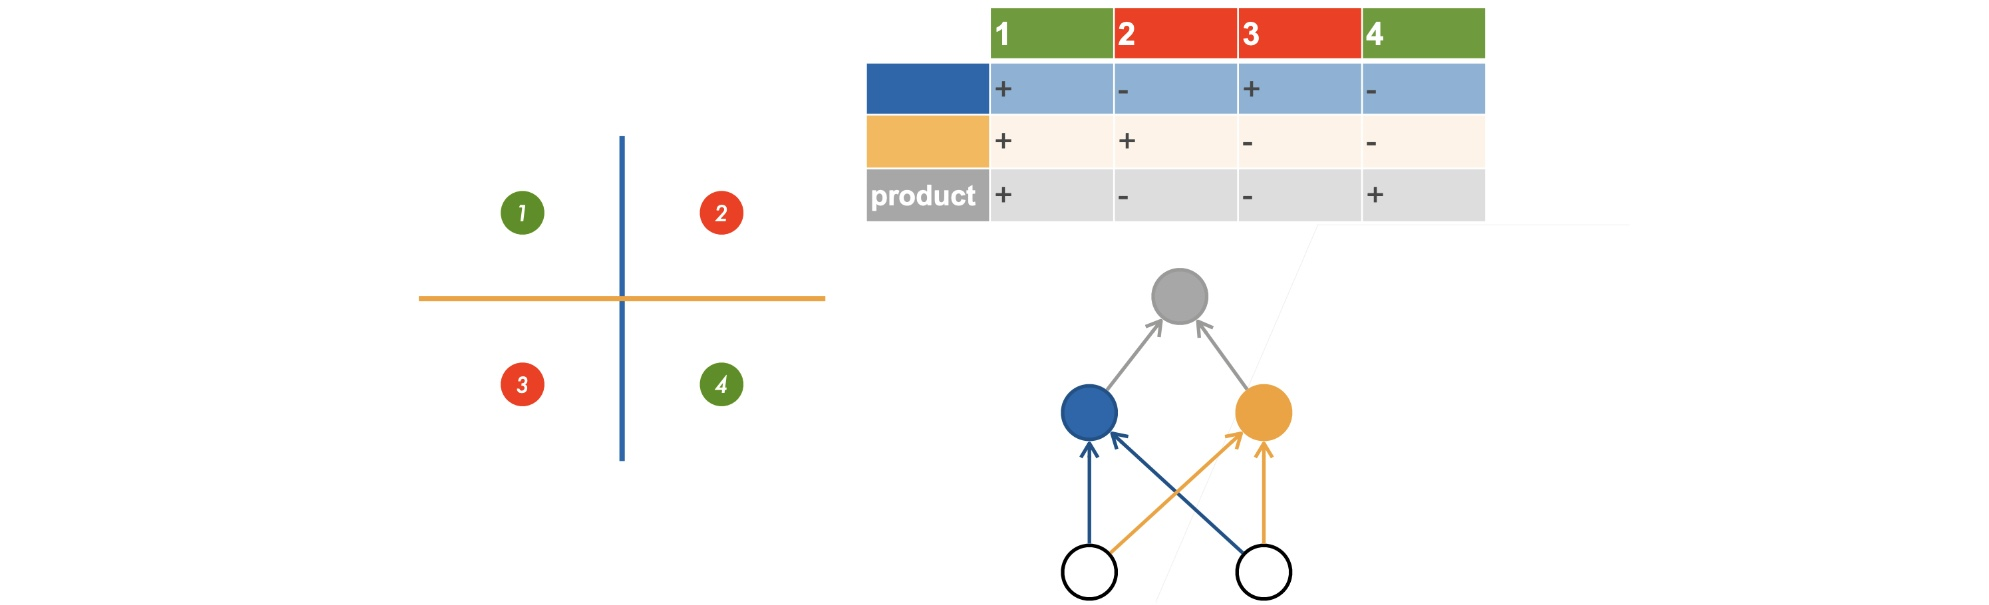

做两次，再组合。多层的idea就这么出来了。

如果隐藏层不加激活函数，那么线性组合多少次线性的都还是线性的，组合起来没用。

### **Activation function**

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

**ReLU**

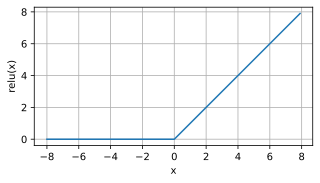

In [4]:
#ReLU
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

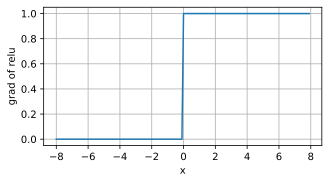

In [6]:
# derivative of y
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

**Sigmoid**

$$
sigmoid(x) = \frac{1}{1+ exp(-x)}
$$

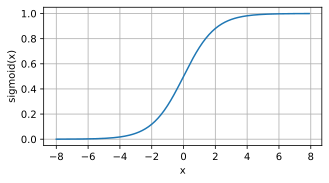

In [7]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize = (5,2.5))

In [ ]:
# grad
x.grad.zero_()
y.backward(torch.ones_like(x), retain_graph=True)


### **手撕感知机**

### **nn框架实现**